# Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyClassifier

# Importing Dataset

In [3]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.head(5)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [8]:
(df.isnull().sum()/len(df))

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

# Data Analysis

C:\Users\pirat\AppData\Local\Temp\ipykernel_8708\287243844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

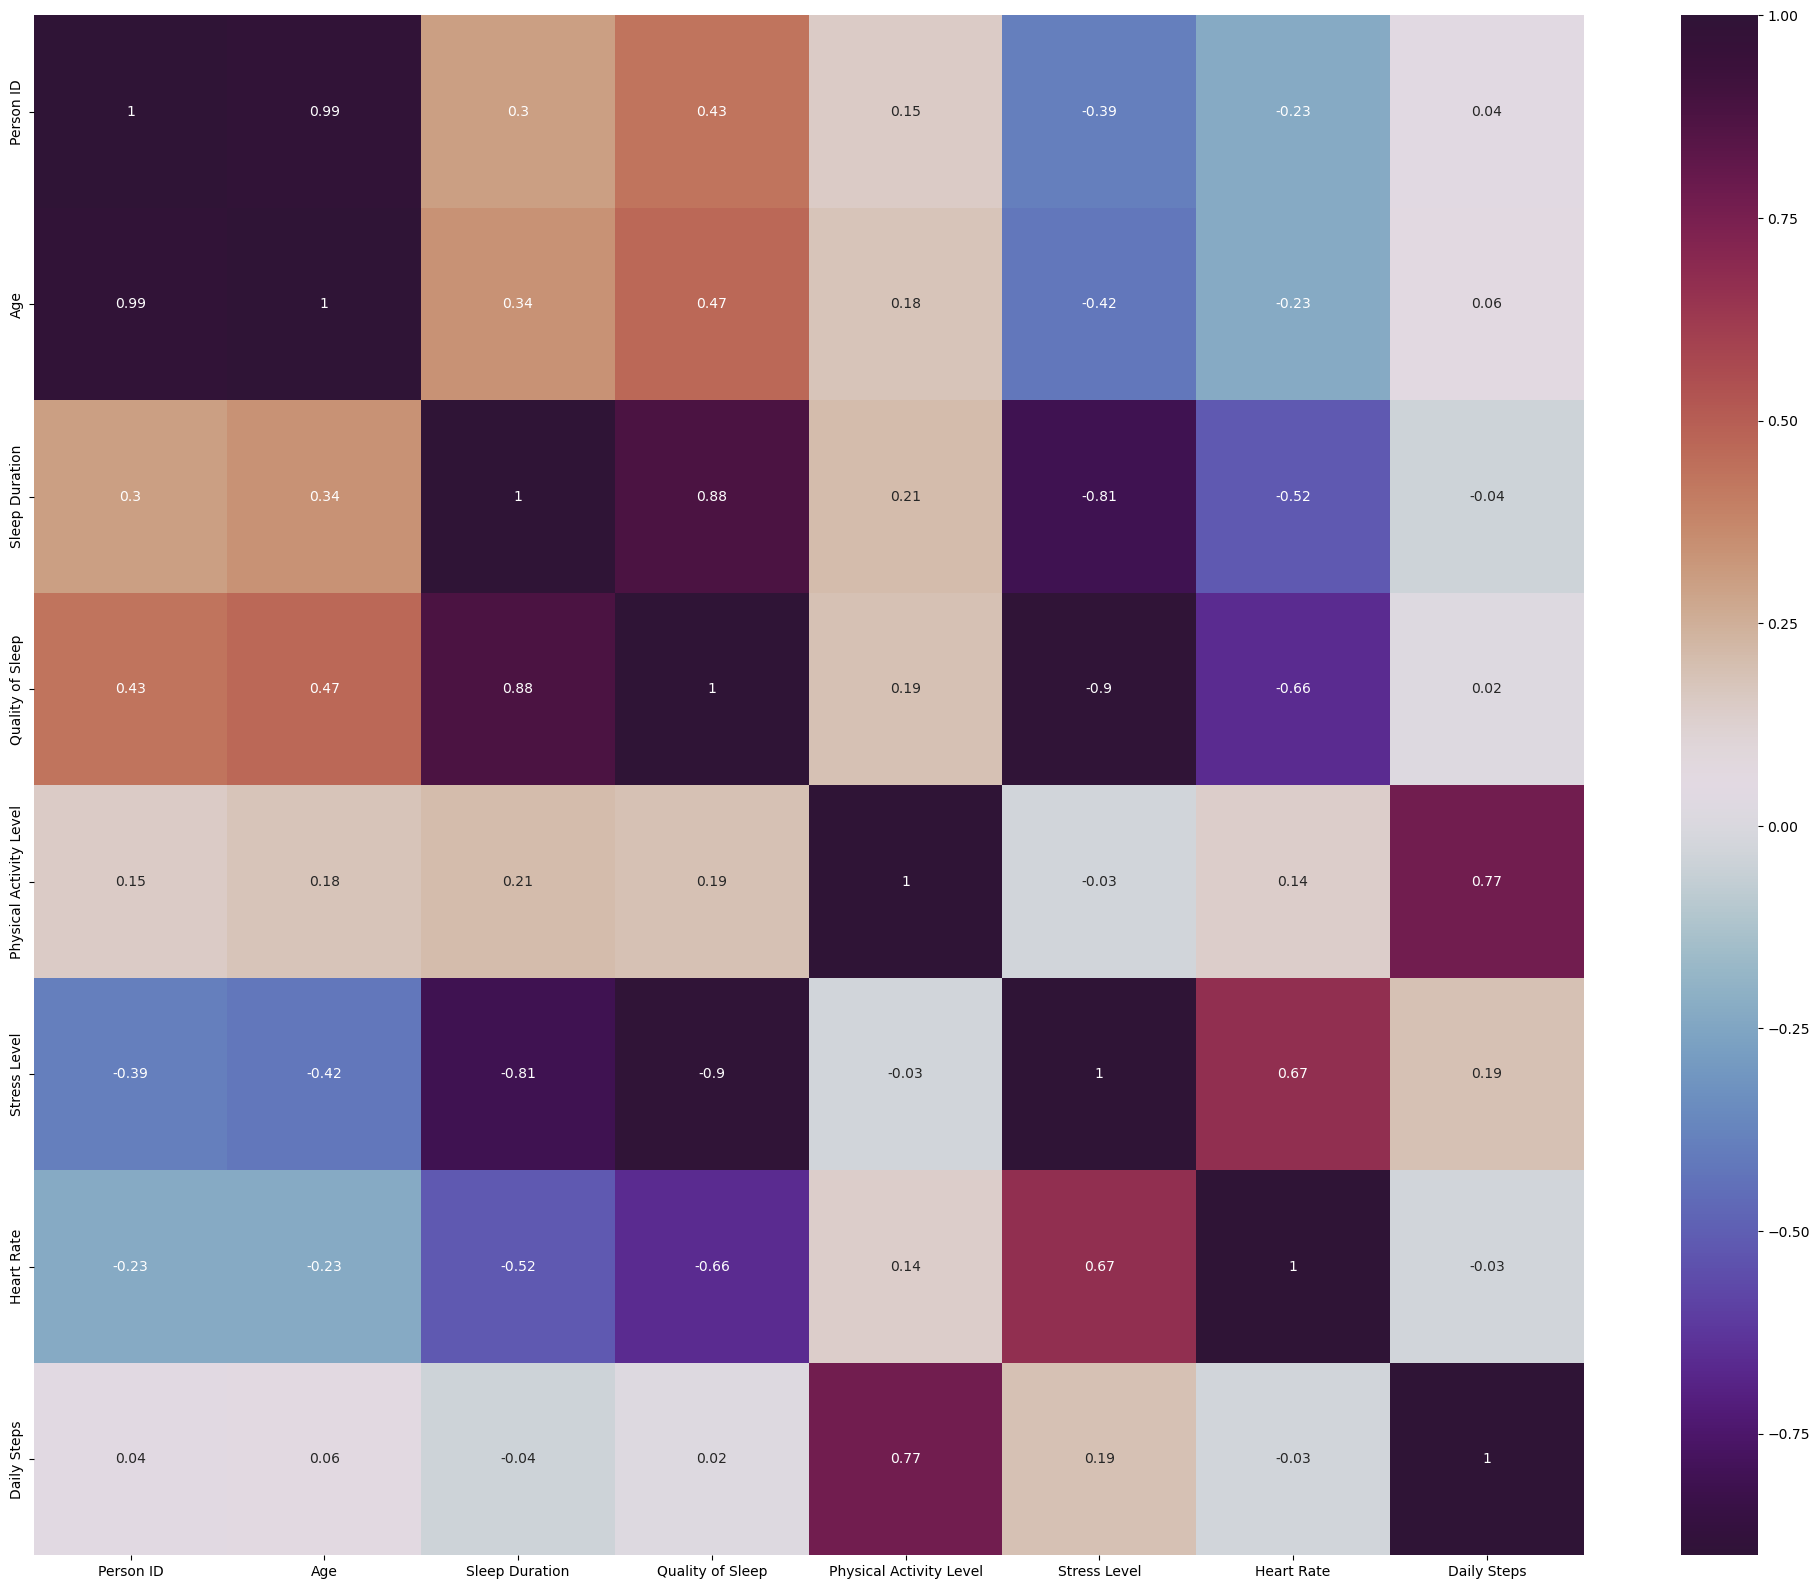

In [11]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'twilight_shifted')

<Axes: title={'center': 'Variable Sleep Disorder'}, xlabel='Sleep Disorder', ylabel='count'>

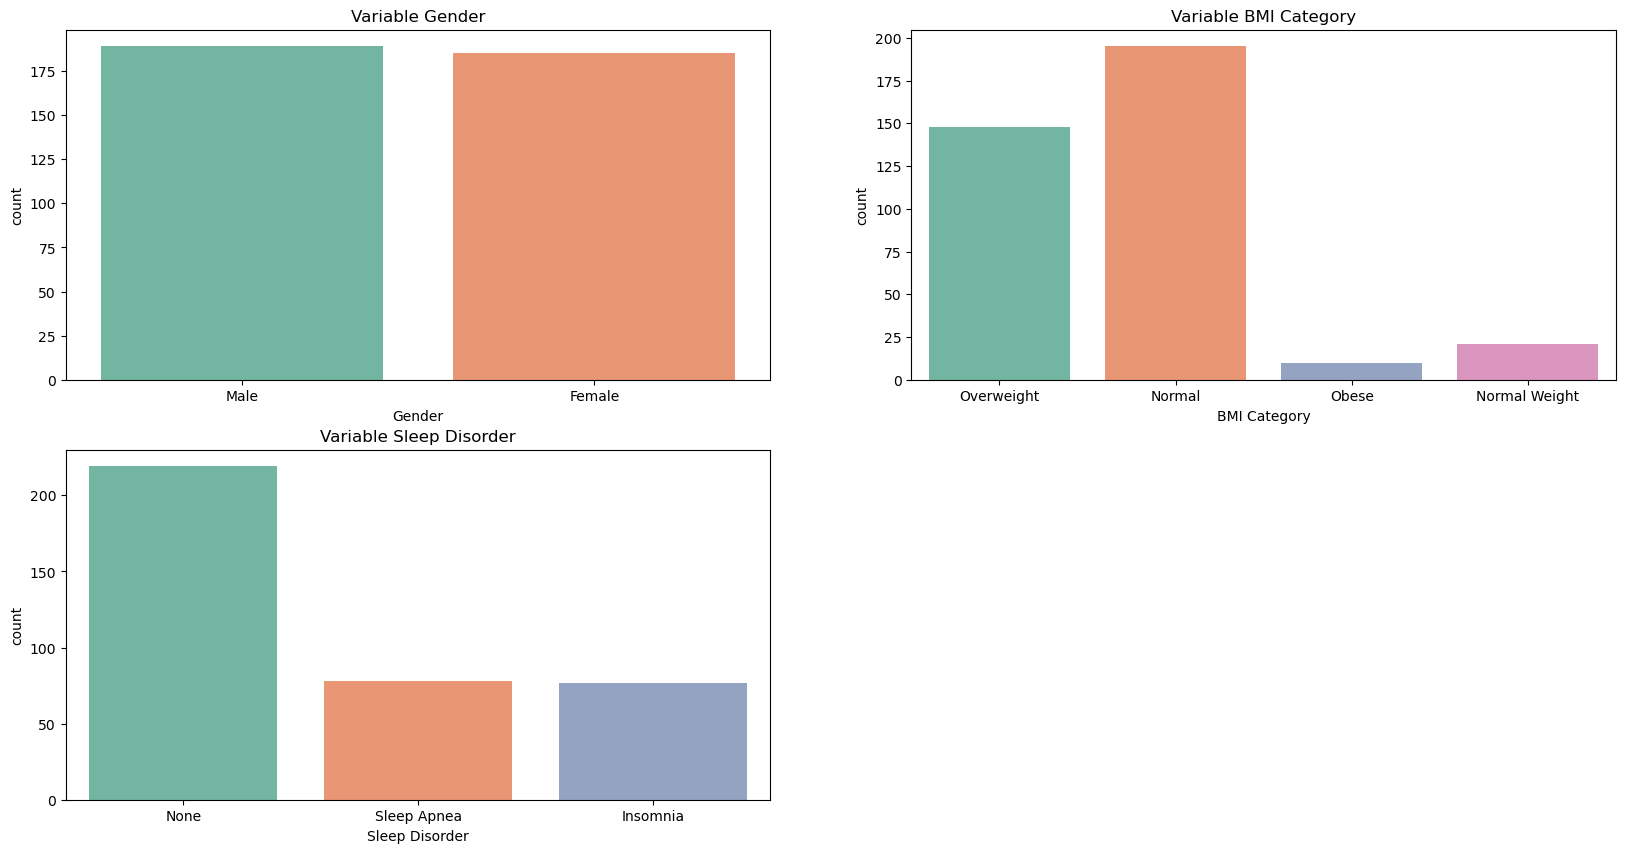

In [12]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', palette = 'Set2', data = df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Sleep Disorder')
sns.countplot(x = 'Sleep Disorder', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

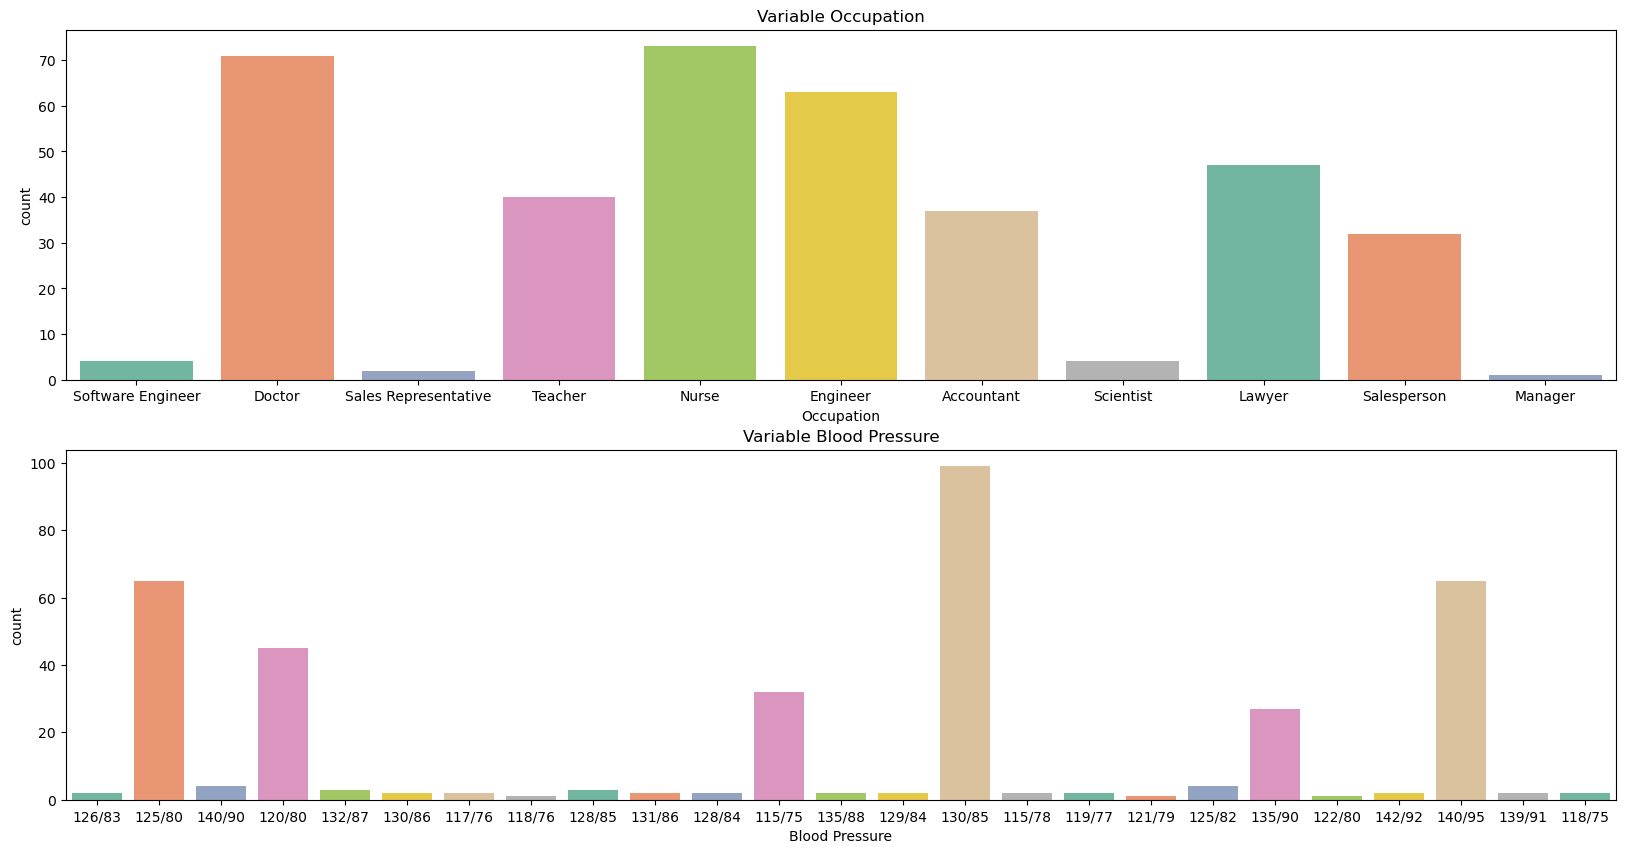

In [13]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', palette = 'Set2', data = df)

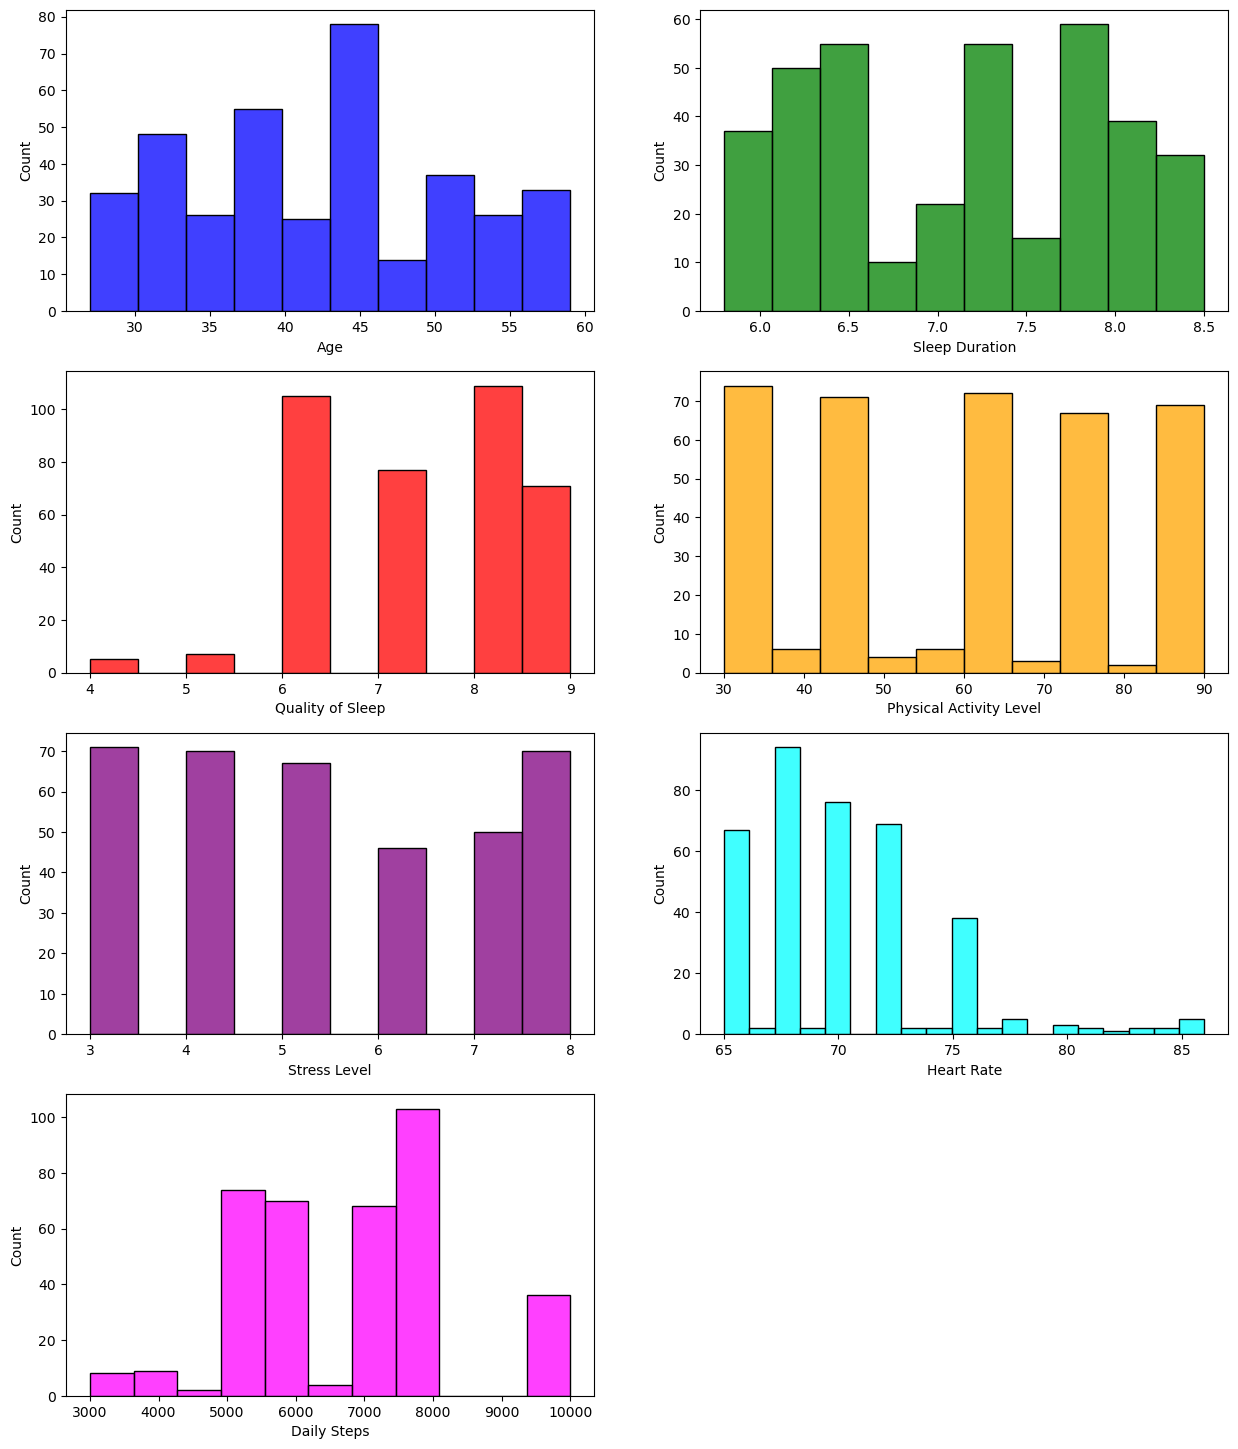

In [15]:
plt.figure(figsize=(15, 18))

plt.subplot(4, 2, 1)
sns.histplot(x=df['Age'], kde=False, color='blue')

plt.subplot(4, 2, 2)
sns.histplot(x=df['Sleep Duration'], kde=False, color='green')

plt.subplot(4, 2, 3)
sns.histplot(x=df['Quality of Sleep'], kde=False, color='red')

plt.subplot(4, 2, 4)
sns.histplot(x=df['Physical Activity Level'], kde=False, color='orange')

plt.subplot(4, 2, 5)
sns.histplot(x=df['Stress Level'], kde=False, color='purple')

plt.subplot(4, 2, 6)
sns.histplot(x=df['Heart Rate'], kde=False, color='cyan')

plt.subplot(4, 2, 7)
sns.histplot(x=df['Daily Steps'], kde=False, color='magenta')

plt.show()

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

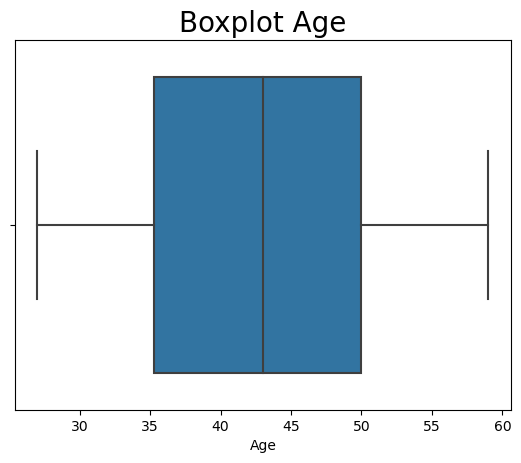

In [16]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

<Axes: title={'center': 'Boxplot Sleep Duration'}, xlabel='Sleep Duration'>

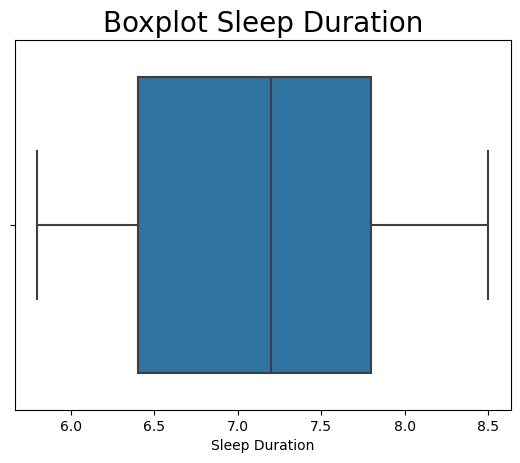

In [17]:
plt.title("Boxplot Sleep Duration", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Sleep Duration"])

<Axes: title={'center': 'Boxplot Quality of Sleep'}, xlabel='Quality of Sleep'>

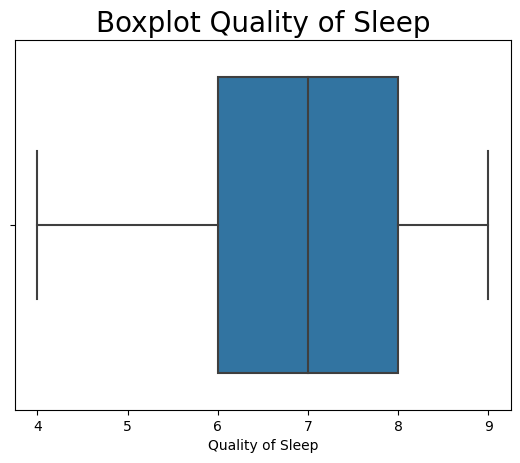

In [18]:
plt.title("Boxplot Quality of Sleep", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Quality of Sleep"])

<Axes: title={'center': 'Boxplot Physical Activity Level'}, xlabel='Physical Activity Level'>

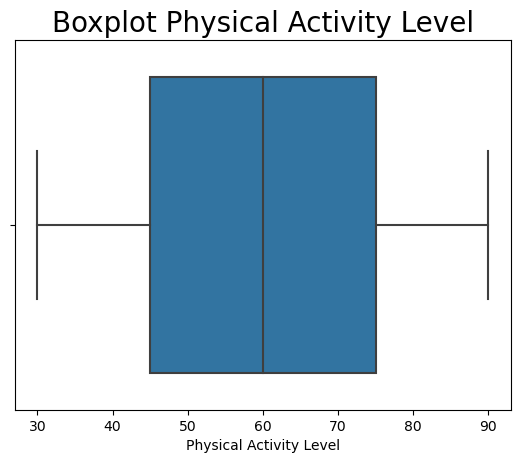

In [19]:
plt.title("Boxplot Physical Activity Level", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Physical Activity Level"])

<Axes: title={'center': 'Boxplot Stress Level'}, xlabel='Stress Level'>

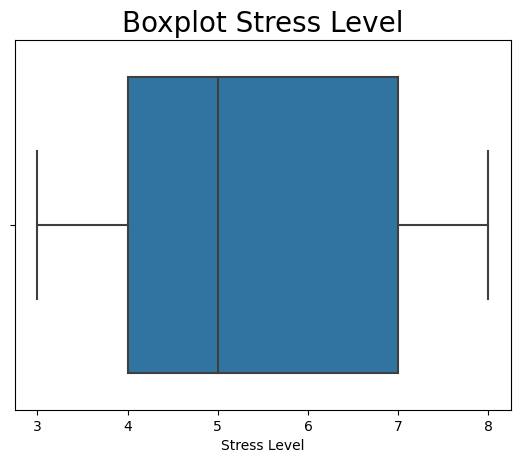

In [20]:
plt.title("Boxplot Stress Level", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Stress Level"])

<Axes: title={'center': 'Variable BMI Category'}, xlabel='BMI Category', ylabel='count'>

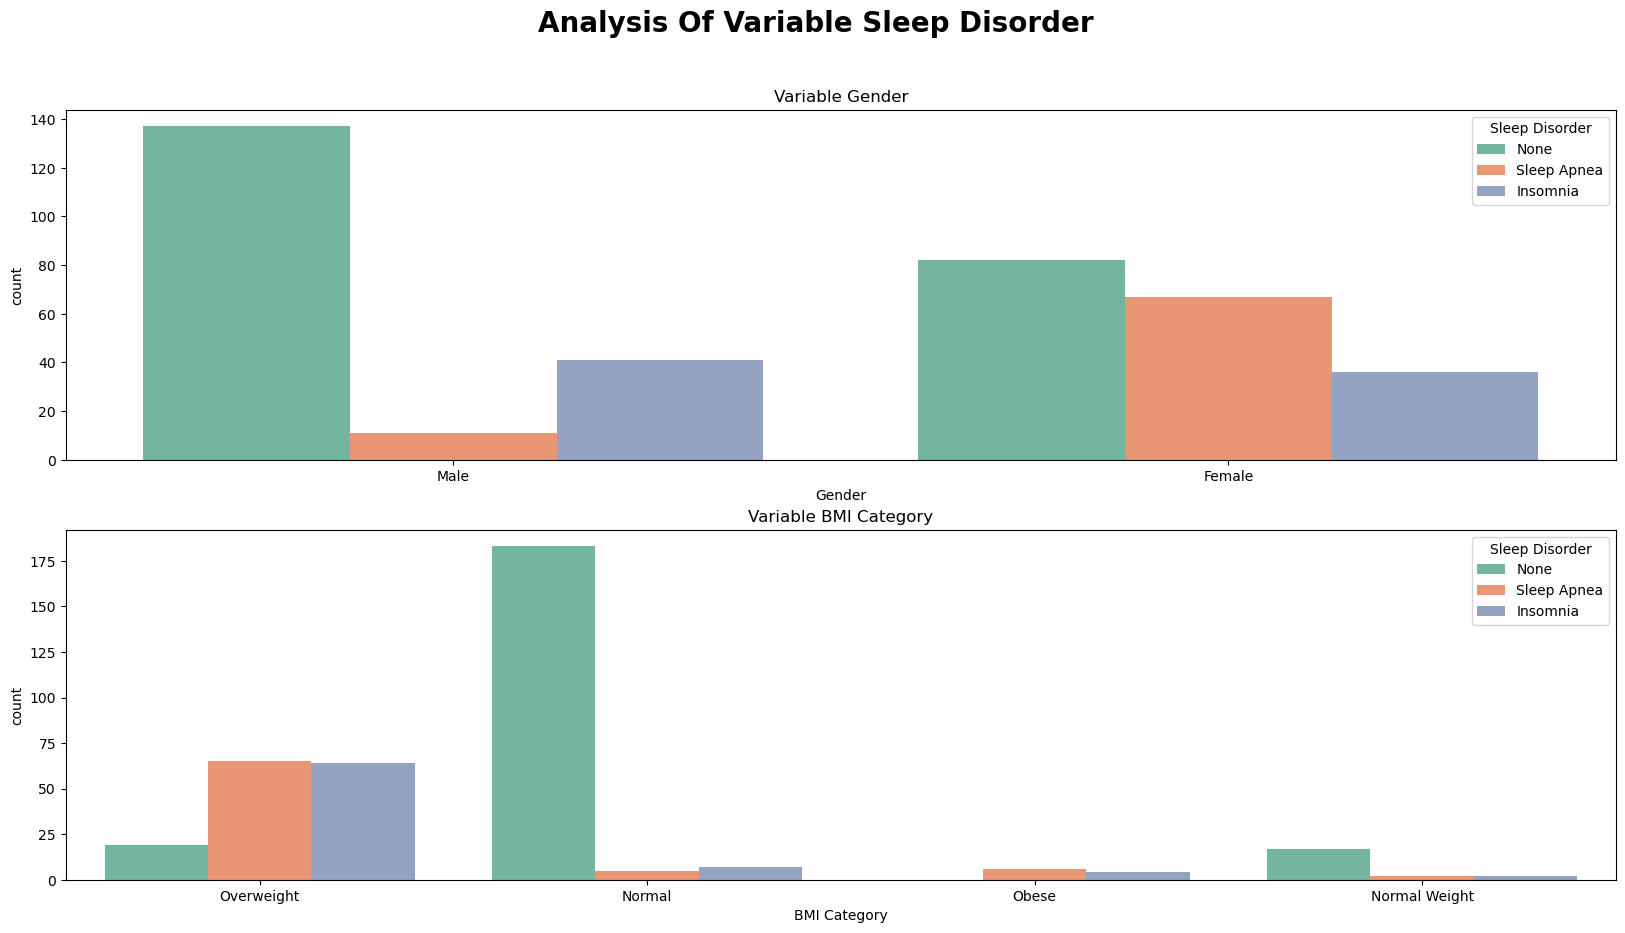

In [21]:
plt.figure(figsize = (20, 10))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Sleep Disorder', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', palette = 'Set2', data = df)

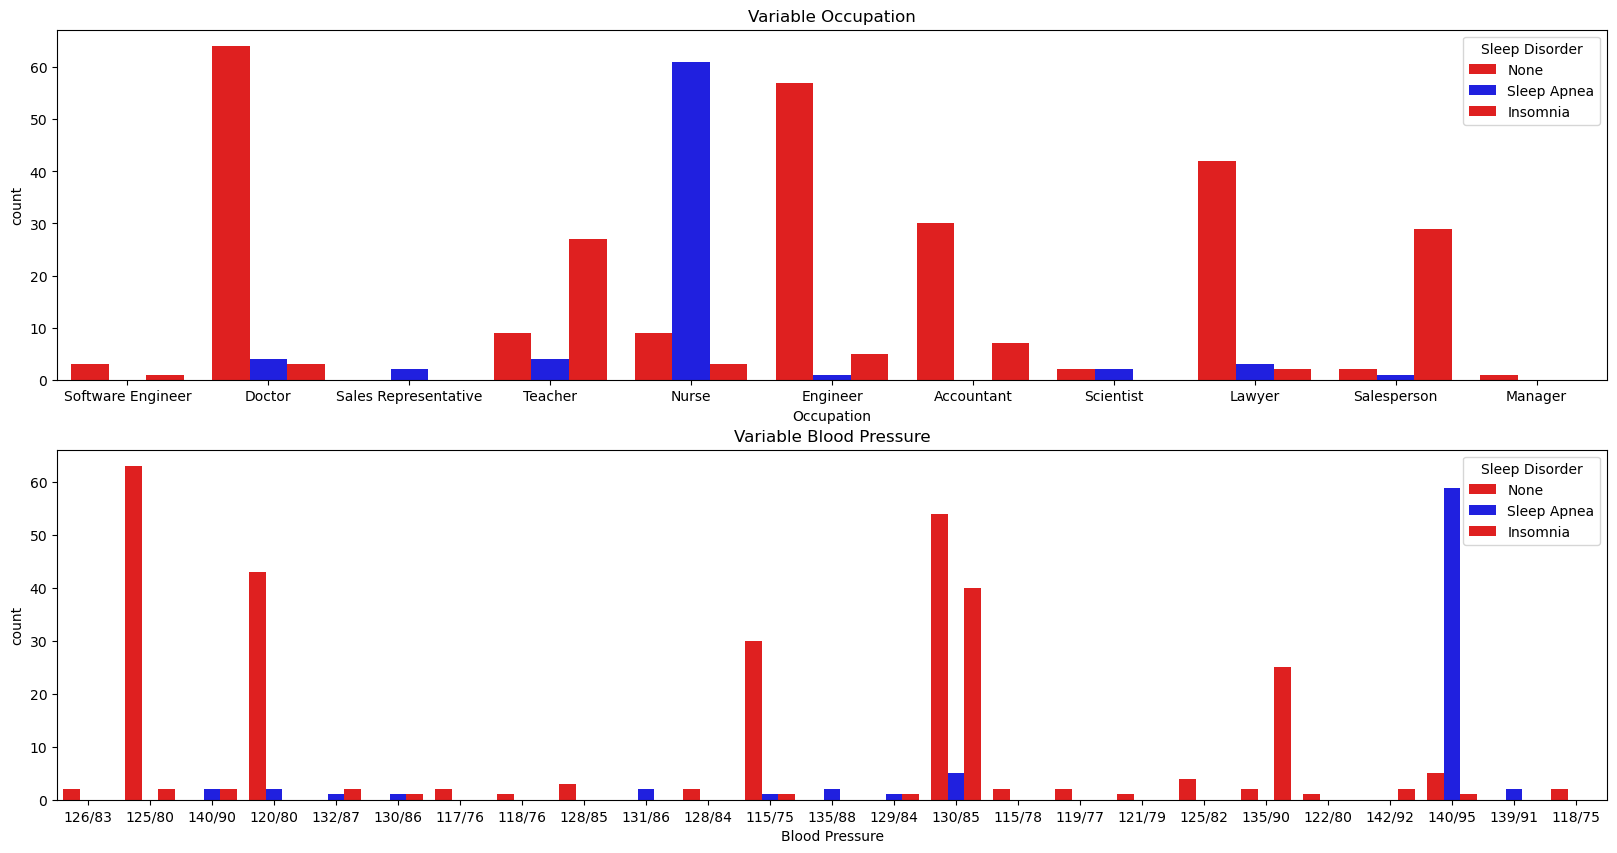

In [23]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x='Occupation', hue='Sleep Disorder', palette=['red', 'blue'], data=df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x='Blood Pressure', hue='Sleep Disorder', palette=['red', 'blue'], data=df)

plt.show()



<Axes: xlabel='Sleep Disorder', ylabel='Daily Steps'>

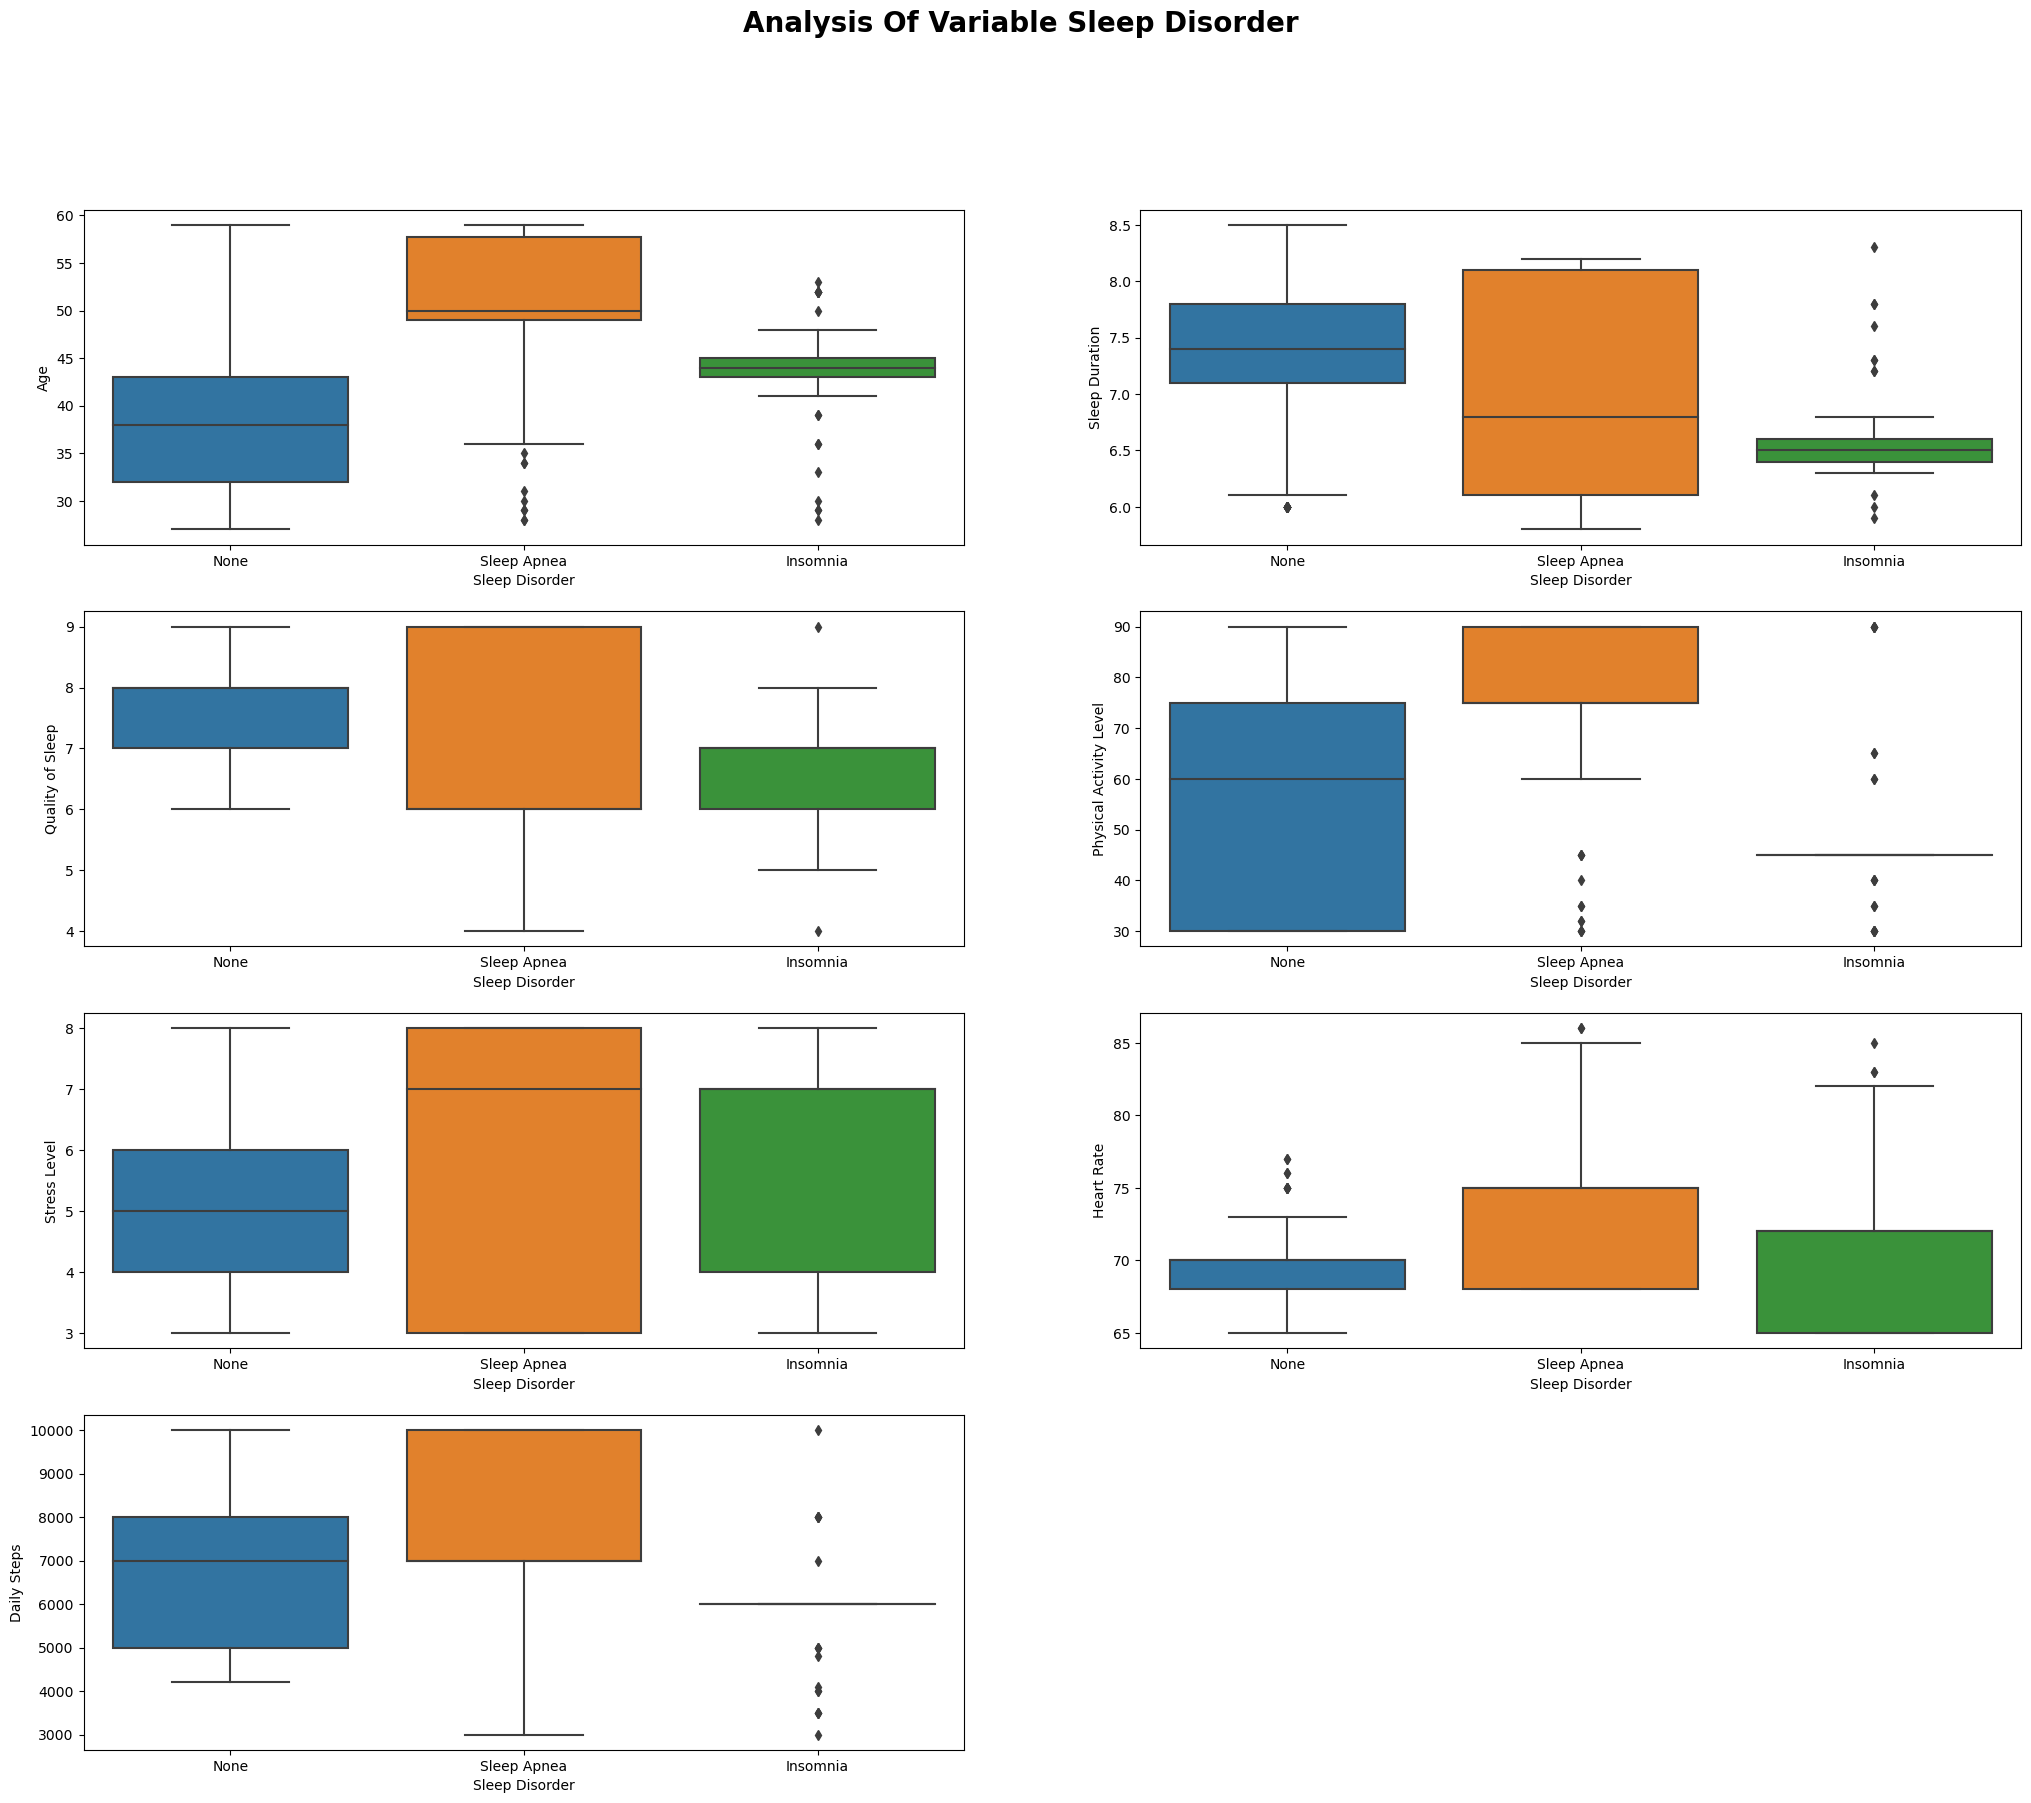

In [24]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="Sleep Disorder", y="Age", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="Sleep Disorder", y="Sleep Duration", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="Sleep Disorder", y="Physical Activity Level", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="Sleep Disorder", y="Stress Level", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="Sleep Disorder", y="Heart Rate", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="Sleep Disorder", y="Daily Steps", data=df)

# Normalize all Numerical Columns

In [27]:
All_Numerical_Columns = df.select_dtypes(exclude=['object']).columns
All_Numerical_Columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')

In [28]:
# Normalize
scaler = MinMaxScaler((0.1,1.1)) # scale the values between 0.1 and 1.1
df[All_Numerical_Columns] = scaler.fit_transform(df[All_Numerical_Columns])
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0.10,Male,0.10,Software Engineer,0.21,0.50,0.30,0.70,Overweight,126/83,0.67,0.27,None
1,0.10,Male,0.13,Doctor,0.25,0.50,0.60,1.10,Normal,125/80,0.58,1.10,None
2,0.11,Male,0.13,Doctor,0.25,0.50,0.60,1.10,Normal,125/80,0.58,1.10,None
3,0.11,Male,0.13,Sales Representative,0.14,0.10,0.10,1.10,Obese,140/90,1.05,0.10,Sleep Apnea
4,0.11,Male,0.13,Sales Representative,0.14,0.10,0.10,1.10,Obese,140/90,1.05,0.10,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.09,Female,1.10,Nurse,0.95,1.10,0.85,0.10,Overweight,140/95,0.24,0.67,Sleep Apnea
370,1.09,Female,1.10,Nurse,0.91,1.10,0.85,0.10,Overweight,140/95,0.24,0.67,Sleep Apnea
371,1.09,Female,1.10,Nurse,0.95,1.10,0.85,0.10,Overweight,140/95,0.24,0.67,Sleep Apnea
372,1.10,Female,1.10,Nurse,0.95,1.10,0.85,0.10,Overweight,140/95,0.24,0.67,Sleep Apnea


# Label Encoding all Categorical Columns

In [29]:
All_Categorical_Columns = list(set(df.select_dtypes(include=['object']).columns) - set(['Sleep Disorder']))
All_Categorical_Columns

['Occupation', 'BMI Category', 'Gender', 'Blood Pressure']

In [30]:
#Label Encode all
le = LabelEncoder()
for col in All_Categorical_Columns:
    df[col] = le.fit_transform(df[col])
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,0.10,1,0.10,9,0.21,0.50,0.30,0.70,3,11,0.67,0.27,None
1,0.10,1,0.13,1,0.25,0.50,0.60,1.10,0,9,0.58,1.10,None
2,0.11,1,0.13,1,0.25,0.50,0.60,1.10,0,9,0.58,1.10,None
3,0.11,1,0.13,6,0.14,0.10,0.10,1.10,2,22,1.05,0.10,Sleep Apnea
4,0.11,1,0.13,6,0.14,0.10,0.10,1.10,2,22,1.05,0.10,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.09,0,1.10,5,0.95,1.10,0.85,0.10,3,23,0.24,0.67,Sleep Apnea
370,1.09,0,1.10,5,0.91,1.10,0.85,0.10,3,23,0.24,0.67,Sleep Apnea
371,1.09,0,1.10,5,0.95,1.10,0.85,0.10,3,23,0.24,0.67,Sleep Apnea
372,1.10,0,1.10,5,0.95,1.10,0.85,0.10,3,23,0.24,0.67,Sleep Apnea


# Lazy Predict

In [31]:
X = df.drop('Sleep Disorder',axis=1)
y = df['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None) #Predictions by 29 classifiers
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 16.00it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.96,0.96,None,0.96,0.01
RandomForestClassifier,0.97,0.96,None,0.97,0.13
QuadraticDiscriminantAnalysis,0.97,0.96,None,0.97,0.01
SVC,0.97,0.96,None,0.97,0.01
ExtraTreeClassifier,0.95,0.94,None,0.95,0.01
BernoulliNB,0.93,0.94,None,0.94,0.01
Perceptron,0.93,0.93,None,0.93,0.01
LinearSVC,0.95,0.93,None,0.95,0.03
BaggingClassifier,0.93,0.92,None,0.93,0.03


# Best Performing Classifier

In [32]:
Best_Classifier, Best_Accuracy, Best_F1 = models.index[0], models['Accuracy'][0], models['F1 Score'][0]
print(f'Best Classifier: {Best_Classifier}\nBest Accuracy: {Best_Accuracy*100}\nBest F1 Score: {Best_F1*100}')

Best Classifier: GaussianNB
Best Accuracy: 96.0
Best F1 Score: 96.0537103972963
